In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


def transform_show(image_path, transform, figsize=(10, 5)):
    img = io.imread(image_path)
    img_trans = transform(image=img)["image"]
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].imshow(img)
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(img_trans)
    axes[1].set_title("Transformed")
    axes[1].axis("off")

    return img, img_trans

In [3]:
height, width = 512, 512

transform = A.Compose(
    [
        A.Rotate(
            interpolation=cv2.INTER_CUBIC,
            border_mode=cv2.BORDER_CONSTANT,
            p=1,
            limit=45,
        ),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Resize(height=height, width=width, interpolation=cv2.INTER_CUBIC),
        A.CenterCrop(height=height, width=width),
        # A.Normalize(mean=mean, std=std),
        # ToTensorV2(),
    ]
)

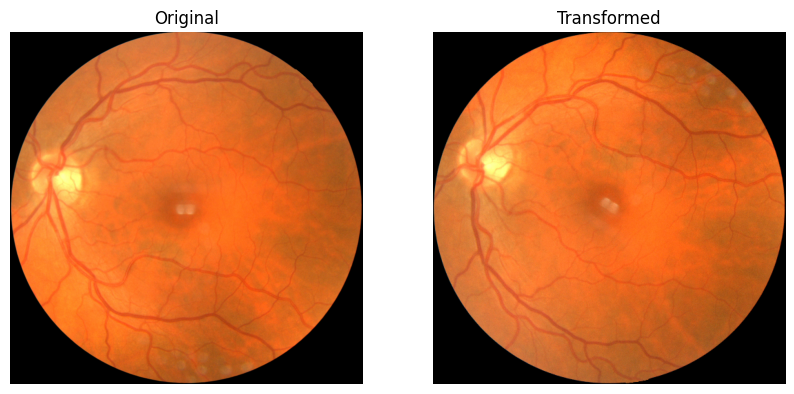

In [4]:
img_path = "example/sample.png"
transform_show(img_path, transform=transform)